<a href="https://colab.research.google.com/github/danielbauer1979/CAS_PredMod/blob/main/pa_pynb_sess1_RegressionAndBoostrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1 -- Intro, Regression, Bootstrap
Dani Bauer
9/4/2022

In this tutorial, you will take first steps with programming in Py in the context of a bootstrap example. We will then demonstrate how to use the boostrapping more generally in the context of a risk measurement example. We will then review linear regression.

We start by importing some of the key libraries. Python by itself is pretty bare-bones, so we have to import most the functionality we required.

In [1]:
import pandas as pd #the key statistical library
import numpy as np #the key numerical library
import math
import matplotlib.pyplot as plt #one of the primary plotting libraries
import statsmodels.api as sm #provides simple regression models, allows for formulas like R
import scipy.stats as st

Plus we will clone our [github repository](https://github.com/danielbauer1979/CAS_PredMod) so as to have all the data available.

In [2]:
!git clone https://github.com/danielbauer1979/CAS_PredMod.git

Cloning into 'CAS_PredMod'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Intro to Python via a Bootstrap Example

### Some basic Python functionality

We start out by generating $n=1,000$ [Gamma distributed](https://en.wikipedia.org/wiki/Gamma_distribution) random variables with parameters $\alpha=3$ and $\theta =100$. In a simulation exercise, it is always helpful to fix the seed for the random number generation such that the code is reproducible.

In [3]:
np.random.seed(42) #set seed

alpha = 3
theta = 100
nsim = 1000

x = np.random.gamma(alpha, theta, nsim)

Let's plot a simple histogram via matplotlib.

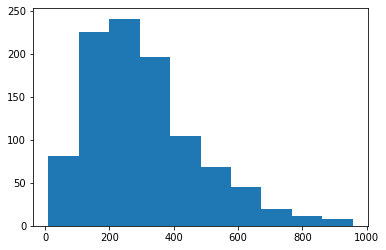

In [4]:
plt.hist(x)
plt.show() 

And let's calculate some aggregate statistics

In [5]:
x.mean() #mean

307.7501362786998

In [6]:
x.var() #variance

29446.632286027907

Of course, we know the "true" expected value and variance here:

In [7]:
print("Expected Value = ",alpha*theta,"and Variance =", alpha * theta * theta)

Expected Value =  300 and Variance = 30000


and while the *estimates* are close, that's what they are: *estimates* based on a finite sample!

### Boostrapping

Boostrapping generally refers to sampling with replacement. That is, we take an original dataset and just generate a “new” version of the data by sampling from the original data. 

But why on earth would one want to do this? It’s simple: By sampling with replacement, we have a new data set that should have the same statistical properties as our original data set. Hence, we can obtain information on the uncertainty of quantities we estimate from the data by analyzing how they vary across our boostrap samples.

Let’s consider this is the context of our previously simulated data set of Gamma random variables.

In [8]:
from pickle import TRUE
np.random.seed(123)
mus = [0] * 500
mus
for i in range(500):
  keep = np.random.choice(x, size=nsim, replace = TRUE)
  mus[i] = keep.mean()

So the mus now contain estimates of the mean for each boostrap sample, and by plotting them we will obtain information of how variable our estimate is:

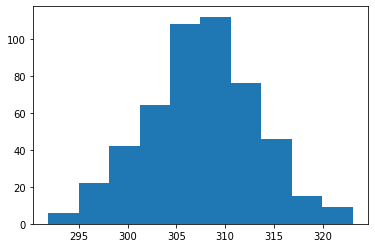

In [9]:
plt.hist(mus)
plt.show() 

Our conventional confidence band for the mean is:

In [10]:
print("confidence band: [",x.mean()-1.96*np.sqrt(x.var()/nsim),",",x.mean()+1.96*np.sqrt(x.var()/nsim),"]")

confidence band: [ 297.1142450330164 , 318.3860275243832 ]


However, and this is the beauty of the bootstrap, we can also obtain confidence intervals by just considering our boostrap distribution:

In [11]:
print("bootstrapped confidence band: [",np.quantile(mus, 0.025),",",np.quantile(mus, 0.975),"]")

bootstrapped confidence band: [ 296.68557258395856 , 318.64090956637443 ]


## Bootstrapping in Action: Estimates of Errors in Risk Measurement

### A primer on Risk Measures

*Risk Measures* have various applications in insurance and finance. For example, capital requirements for companies or certain lines of business are set via risk measures, and insurers use risk measures for capital allocation – which is a key input in pricing and performance measurement.

Generally, the risk measure $\rho$ for a random outcome $X$ is a number that depends on the distribution of $X,$ i.e. we are evaluating $\rho(X)$. Here, $X$ can be given via a distribution or via a dataset, so that it may be more appropriate to write $\rho(X_1,X_2,...,X_N)$ where $X_i$ are (independent and identically-distrubuted) realizations of the risk $X.$

Prominent examples of risk measures are the Value-at-Risk (VaR) at a certain confidence level $\alpha,$ say 1%. This corresponds to the 99% quantile, i.e. the number so that we can be sure that a given loss outcome will be smaller than VaR-1% with a probability of 99%. Another example is the Tail-Value-at-Risk (TVaR) -- or also called the Conditional Tail Expectation -- that averages the losses in the tail above the VaR at a given confidence level.

Determining the VaR or the TVaR is straightforward when having a sample of losses. For VaR, all we need to do is sort the sample and then take the $\alpha \times N$ largest value. E.g., if we have 1,000 outcomes and we are looking for VaR-1%, we simply take the 10th largest value. Similarly, for TVaR, we average over the outcomes in the tail. In the context of the example, that amounts to taking the average of the ten largest outcomes.

However, due to the direct correspondence to capital, companies as well as regulators are not only interested in the actual number, but also in the associated uncertainty. For instance, if the estimate is 10 million USD, is it really something between 5 million or 15 million – or something between 9 million and 11 million? In particular, stakeholders frequently are interested in confidence bands for the risk measure.

While generally a nontrivial probabilistic problem, the bootstrap allows for a relatively straightforward assessment of the estimation uncertainty – or, in other words, the calculation of a confidence interval:

* Draw $B$ samples of size $N$ from the original dataset $X_1,...,X_N.$
* For each of the $B$ new datasets, evaluate the risk measure $\rho$.
* Plot all $B$ estimates or determine large and small choices to assess the uncertainty. For instance, a 90% confidence region is given by the $5\%×B$ largest value and the $95\%×B$ largest value.

### Application in the Context of Norwegian Fire Insurance Claims

We take the Norwegian fire loss data from the textbook on extremal modeling by Jan Beirlant, Yuri Goegebeur, Johan Segers, Jozef L. Teugels. The 2006 North-American Actuarial Journal paper by Thomas Kaiser and Vytaras Brazauskas carries out a similar exercise as the one considered here. The dataset is saved on our github repository, so you can access it with ease. 

Thwe dataset is tab separated and does not have columns

In [12]:
fire_data = pd.read_csv("CAS_PredMod/pa_data_norwegianfire.txt",delimiter='\t',header=None)
fire_data.columns = ['Loss', 'Year']
n_fire_data = len(fire_data.index)
fire_data.head()

,Loss,Year
0,520,72
1,529,72
2,530,72
3,530,72
4,544,72


As described, calculating risk measures is relatively straightforward when sorting the losses:

In [13]:
fire_data_sort = fire_data.sort_values(by=['Loss'])
fire_data_sort = fire_data_sort.reset_index(drop=True)
Losses = fire_data_sort.Loss
VaR1P = Losses[np.floor(.99 * n_fire_data)-1]
VaR1P

19793

In [14]:
TVaR1P = Losses[range(math.floor(.99 * n_fire_data)-1,n_fire_data)].mean() #the np floor function does not return an integer, so using the math version
TVaR1P

50954.63440860215

To assess the estimation error, we again rely on bootstrapping. We proceed as before:

In [15]:
np.random.seed(123)
VaRs = [0] * 500
TVaR1P = [0] * 500
mus
for i in range(500):
  keep = np.random.choice(Losses, size=n_fire_data, replace = TRUE)
  VaRs[i] = np.quantile(keep,0.99)

And we can illustrate the uncertainty in our estimate via looking at tge resulting distribution of our estimates.

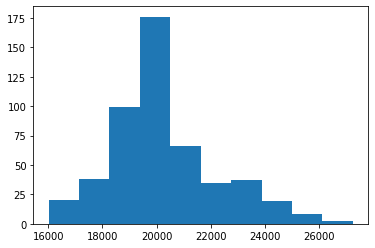

In [16]:
plt.hist(VaRs)
plt.show() 

With the following confidence band:

In [17]:
print("bootstrapped confidence band: [",np.quantile(VaRs, 0.025),",",np.quantile(VaRs, 0.975),"]")

bootstrapped confidence band: [ 16945.745000000024 , 24241.55500000011 ]


There is also provided functionality within Python. E.g., we can use the boostrap function within the scipy stats library to obtain a confidence interval for the median:

In [19]:
Losses_list = (Losses,)
bootstrap_ci = st.bootstrap(Losses_list, np.median, confidence_level=0.95,random_state=1, method='percentile')
bootstrap_ci

BootstrapResult(confidence_interval=ConfidenceInterval(low=1003.0, high=1045.0), standard_error=9.909393797892523)

# Regression Refresher: Galton Data

The most basic predictive modeling technique is (linear) regression. To provide a refresher, let’s look at the famous Galton data example which provides data on the heights of parents and their children (the data needs to be in your working directory):

In [20]:
galton_data = pd.read_csv("CAS_PredMod/pa_data_galtonData.txt")
galton_data.head()

,child,parent
0,66.780879,66.006075
1,71.229985,69.589957
2,70.098295,69.603125
3,68.438181,69.270306
4,64.071776,68.092429


In [21]:
galton_data.describe()

,child,parent
count,928.000000,928.000000
mean,68.086828,68.310356
std,2.527919,1.817696
min,61.260745,63.581359
25%,66.396484,67.241626
50%,68.170713,68.346832
75%,69.735016,69.488074
max,74.131369,73.375229


## Review of Linear Regression

In a conventional linear regression problem with independent variables $x_i$ and dependent variables $y_i$, we assume a linear relationship:
$$
y_i = \beta_0+\sum_{j=1}^p \beta_j\,x_{i,j} + \varepsilon_i.
$$

In order to make a *prediction* for a data point $x_0$ outside of our sample -- which is the purpose of the entire enterprise -- we need to determine an *estimate* for our regression parameter $\beta$, which is generally labeled as $\hat{\beta}$ .  We will use our data set -- the so-called *training data* -- for deriving this estimate.  Once we have an estimate $\hat{\beta}$, we obtain a prediction for our (unknown) outcome for the *features* $x_0$ via:
$$
y_0 = \hat{\beta}_0 + \sum_{j=1}^p \hat{\beta}_j\,x_{0,j}.
$$


OLS regression determines the estimate $\hat{\beta}$ that best approximates the training data in the *least-squares sense*:
$$
\hat{\beta}^{\text{OLS}} = \text{argmin}_{\beta}\left\{\sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p \beta_j\,x_{i,j}\right)\right)^2 \right\}.
$$
The OLS estimate has some nice properties, e.g.:

* *Computational*: It is possible to solve for the OLS estimate in closed form.  Indeed, we obtain: 
$$
\hat{\beta}^{\text{OLS}} = (X'X)^{-1}X'y,
$$
where $X$ is the so-called *design matrix*, whose row $i$ is $x_i'$ and contains the features for the $i$th observation.

* *Statistical*: Due to the estimator's form, it is possible to derive the (approximate/limiting) distribution of the estimate via the central limit theorem.  In particular, this allows to draw inference whether the influence is significantly different from zero (illustrated via "stars", see below).

There are many packages for running regressions in Python. Here we rely on a package that allows for forumulas and thus has a similar feel as R regressions. We will get to know others soon:

In [22]:
from statsmodels.formula.api import ols
first_reg = ols(formula="child ~ parent", data=galton_data).fit()
print(first_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     243.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           7.32e-49
Time:                        03:55:31   Log-Likelihood:                -2068.7
No. Observations:                 928   AIC:                             4141.
Df Residuals:                     926   BIC:                             4151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7584      2.779      8.908      0.0

We can also get confidence intervals for the regression coefficients:

In [23]:
first_reg.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,19.303953,30.212873
parent,0.554468,0.714108


Let's look at the residulas to check whether they are exhibiting an adequate form (ideally, theyb should be close to a normal distribution).

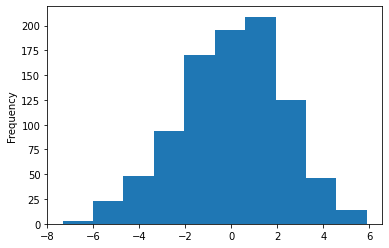

In [24]:
y = galton_data['child']
y_pred = first_reg.predict()
eps = y - y_pred
eps.plot(kind='hist')

We can check more formally via a q-q plot:

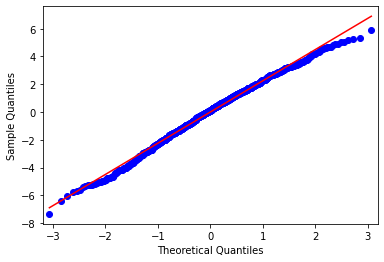

In [25]:
fig = sm.qqplot(eps, line="s")
plt.show()